In [1]:
# What is Time Series?

# How to create a time series?
library(forecast)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 6.2 



# There are different time series forecasting methods to forecast stock price, demand etc. In this machine learning project, you will learn to determine which forecasting method to be used when and how to apply with time series forecasting example.

## In this machine learning project, we will be taking open source datasets that are publicly available and will be discussing various methods/techniques of performing time series forecasting. We will discuss about the traditional methods such as holt-winters method, Autoregressive integrated moving average method, exponential smoothing methods, as well we will also be comparing the modern methods of performing forecasting using neural network based models.

In [2]:
tsD <- 1100:1200
tsD

[1] 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114
 [16] 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129
 [31] 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144
 [46] 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159
 [61] 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174
 [76] 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189
 [91] 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200

In [3]:
ts(tsD, frequency = 4,start = c(2010,1))

     Qtr1 Qtr2 Qtr3 Qtr4
2010 1100 1101 1102 1103
2011 1104 1105 1106 1107
2012 1108 1109 1110 1111
2013 1112 1113 1114 1115
2014 1116 1117 1118 1119
2015 1120 1121 1122 1123
2016 1124 1125 1126 1127
2017 1128 1129 1130 1131
2018 1132 1133 1134 1135
2019 1136 1137 1138 1139
2020 1140 1141 1142 1143
2021 1144 1145 1146 1147
2022 1148 1149 1150 1151
2023 1152 1153 1154 1155
2024 1156 1157 1158 1159
2025 1160 1161 1162 1163
2026 1164 1165 1166 1167
2027 1168 1169 1170 1171
2028 1172 1173 1174 1175
2029 1176 1177 1178 1179
2030 1180 1181 1182 1183
2031 1184 1185 1186 1187
2032 1188 1189 1190 1191
2033 1192 1193 1194 1195
2034 1196 1197 1198 1199
2035 1200               

In [4]:
ts(tsD, frequency = 12,start = c(2010,1))

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
2010 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
2011 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123
2012 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135
2013 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147
2014 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159
2015 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171
2016 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183
2017 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195
2018 1196 1197 1198 1199 1200                                   

In [5]:
ts(tsD, frequency = 1,start = c(2010,1))

Time Series:
Start = 2010 
End = 2110 
Frequency = 1 
  [1] 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114
 [16] 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129
 [31] 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144
 [46] 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159
 [61] 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174
 [76] 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189
 [91] 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200

In [6]:
AirPassengers

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

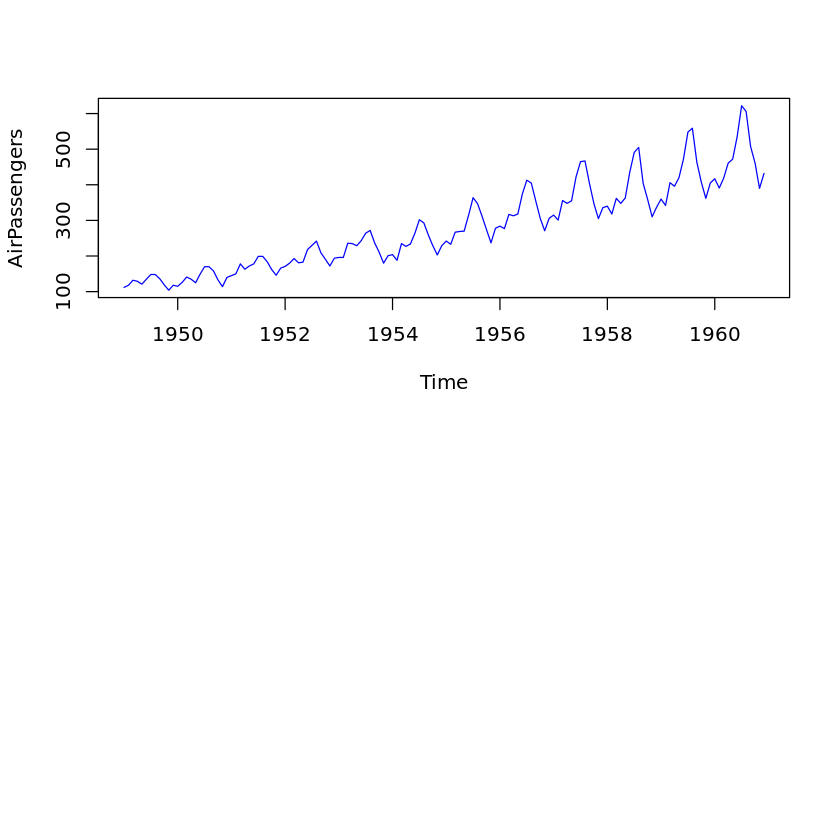

In [7]:
par(mfrow=c(2,1))
plot(AirPassengers,col='blue')

In [8]:
# Components of a time series?
# Yt = St + Tt + et ----additive model

# Yt = St * Tt * et ----multiplicative model

# How to convert a multiplicative time series into an additive time series

# By using logarithimic transformation


In [9]:
# Assumptions of a time series forecasting model

#1- Time is continuous
#2- Stationarity:
    #1- mean value should be constant over time, trend component should not be there
    #2- variance does not increase over time 
    #3- there should not be any seasonality

In [10]:
#Investigate the components of a time series

# to extract the trend, seasonality and random terms from the model
# there are two functions
decompose
stl

function (x, type = c("additive", "multiplicative"), filter = NULL) 
{
    type <- match.arg(type)
    l <- length(x)
    f <- frequency(x)
    if (f <= 1 || length(na.omit(x)) < 2 * f) 
        stop("time series has no or less than 2 periods")
    if (is.null(filter)) 
        filter <- if (!f%%2) 
            c(0.5, rep_len(1, f - 1), 0.5)/f
        else rep_len(1, f)/f
    trend <- filter(x, filter)
    season <- if (type == "additive") 
        x - trend
    else x/trend
    periods <- l%/%f
    index <- seq.int(1L, l, by = f) - 1L
    figure <- numeric(f)
    for (i in 1L:f) figure[i] <- mean(season[index + i], na.rm = TRUE)
    figure <- if (type == "additive") 
        figure - mean(figure)
    else figure/mean(figure)
    seasonal <- ts(rep(figure, periods + 1)[seq_len(l)], start = start(x), 
        frequency = f)
    structure(list(x = x, seasonal = seasonal, trend = trend, 
        random = if (type == "additive") x - seasonal - trend else x/seasonal/trend, 
        figure = figure, type = type), class = "decomposed.ts")
}
<bytecode: 0x28cbdd8>
<environment: namespace:stats>

function (x, s.window, s.degree = 0, t.window = NULL, t.degree = 1, 
    l.window = nextodd(period), l.degree = t.degree, s.jump = ceiling(s.window/10), 
    t.jump = ceiling(t.window/10), l.jump = ceiling(l.window/10), 
    robust = FALSE, inner = if (robust) 1 else 2, outer = if (robust) 15 else 0, 
    na.action = na.fail) 
{
    nextodd <- function(x) {
        x <- round(x)
        if (x%%2 == 0) 
            x <- x + 1
        as.integer(x)
    }
    deg.check <- function(deg) {
        degname <- deparse(substitute(deg))
        deg <- as.integer(deg)
        if (deg < 0 || deg > 1) 
            stop(gettextf("%s must be 0 or 1", degname), domain = NA)
        deg
    }
    x <- na.action(as.ts(x))
    if (is.matrix(x)) 
        stop("only univariate series are allowed")
    n <- as.integer(length(x))
    if (is.na(n)) 
        stop("invalid length(x)")
    period <- frequency(x)
    if (period < 2 || n <= 2 * period) 
        stop("series is not periodic or has less than two periods")
    periodic <- FALSE
    if (is.character(s.window)) {
        if (is.na(pmatch(s.window, "periodic"))) 
            stop("unknown string value for s.window")
        else {
            periodic <- TRUE
            s.window <- 10 * n + 1
            s.degree <- 0
        }
    }
    s.degree <- deg.check(s.degree)
    t.degree <- deg.check(t.degree)
    l.degree <- deg.check(l.degree)
    if (is.null(t.window)) 
        t.window <- nextodd(ceiling(1.5 * period/(1 - 1.5/s.window)))
    storage.mode(x) <- "double"
    z <- .Fortran(C_stl, x, n, as.integer(period), as.integer(s.window), 
        as.integer(t.window), as.integer(l.window), s.degree, 
        t.degree, l.degree, nsjump = as.integer(s.jump), ntjump = as.integer(t.jump), 
        nljump = as.integer(l.jump), ni = as.integer(inner), 
        no = as.integer(outer), weights = double(n), seasonal = double(n), 
        trend = double(n), double((n + 2 * period) * 5))
    if (periodic) {
        which.cycle <- cycle(x)
        z$seasonal <- tapply(z$seasonal, which.cycle, mean)[which.cycle]
    }
    remainder <- as.vector(x) - z$seasonal - z$trend
    y <- cbind(seasonal = z$seasonal, trend = z$trend, remainder = remainder)
    res <- list(time.series = ts(y, start = start(x), frequency = period), 
        weights = z$weights, call = match.call(), win = c(s = s.window, 
            t = t.window, l = l.window), deg = c(s = s.degree, 
            t = t.degree, l = l.degree), jump = c(s = s.jump, 
            t = t.jump, l = l.jump), inner = z$ni, outer = z$no)
    class(res) <- "stl"
    res
}
<bytecode: 0x1d46b80>
<environment: namespace:stats>

In [11]:
EuStockMarkets[1:10,]

DAX     SMI    CAC    FTSE  
 [1,] 1628.75 1678.1 1772.8 2443.6
 [2,] 1613.63 1688.5 1750.5 2460.2
 [3,] 1606.51 1678.6 1718.0 2448.2
 [4,] 1621.04 1684.1 1708.1 2470.4
 [5,] 1618.16 1686.6 1723.1 2484.7
 [6,] 1610.61 1671.6 1714.3 2466.8
 [7,] 1630.75 1682.9 1734.5 2487.9
 [8,] 1640.17 1703.6 1757.4 2508.4
 [9,] 1635.47 1697.5 1754.0 2510.5
[10,] 1645.89 1716.3 1754.3 2497.4

In [12]:
tsData <- EuStockMarkets[,1]

In [13]:
decompose(tsData,type = 'additive')

$x
Time Series:
Start = c(1991, 130) 
End = c(1998, 169) 
Frequency = 260 
   [1] 1628.75 1613.63 1606.51 1621.04 1618.16 1610.61 1630.75 1640.17 1635.47
  [10] 1645.89 1647.84 1638.35 1629.93 1621.49 1624.74 1627.63 1631.99 1621.18
  [19] 1613.42 1604.95 1605.75 1616.67 1619.29 1620.49 1619.67 1623.07 1613.98
  [28] 1631.87 1630.37 1633.47 1626.55 1650.43 1650.06 1654.11 1653.60 1501.82
  [37] 1524.28 1603.65 1622.49 1636.68 1652.10 1645.81 1650.36 1651.55 1649.88
  [46] 1653.52 1657.51 1649.55 1649.09 1646.41 1638.65 1625.80 1628.64 1632.22
  [55] 1633.65 1631.17 1635.80 1621.27 1624.70 1616.13 1618.12 1627.80 1625.79
  [64] 1614.80 1612.80 1605.47 1609.32 1607.48 1607.48 1604.89 1589.12 1582.27
  [73] 1567.99 1568.16 1569.71 1571.74 1585.41 1570.01 1561.89 1565.18 1570.34
  [82] 1577.00 1590.29 1572.72 1572.07 1579.19 1588.73 1586.01 1579.77 1572.58
  [91] 1568.09 1578.21 1573.94 1582.06 1610.18 1605.16 1623.84 1615.26 1627.08
 [100] 1626.97 1605.70 1589.70 1589.70 1603.26 1599.75 1

In [14]:
decompose(tsData,type = 'multiplicative')

$x
Time Series:
Start = c(1991, 130) 
End = c(1998, 169) 
Frequency = 260 
   [1] 1628.75 1613.63 1606.51 1621.04 1618.16 1610.61 1630.75 1640.17 1635.47
  [10] 1645.89 1647.84 1638.35 1629.93 1621.49 1624.74 1627.63 1631.99 1621.18
  [19] 1613.42 1604.95 1605.75 1616.67 1619.29 1620.49 1619.67 1623.07 1613.98
  [28] 1631.87 1630.37 1633.47 1626.55 1650.43 1650.06 1654.11 1653.60 1501.82
  [37] 1524.28 1603.65 1622.49 1636.68 1652.10 1645.81 1650.36 1651.55 1649.88
  [46] 1653.52 1657.51 1649.55 1649.09 1646.41 1638.65 1625.80 1628.64 1632.22
  [55] 1633.65 1631.17 1635.80 1621.27 1624.70 1616.13 1618.12 1627.80 1625.79
  [64] 1614.80 1612.80 1605.47 1609.32 1607.48 1607.48 1604.89 1589.12 1582.27
  [73] 1567.99 1568.16 1569.71 1571.74 1585.41 1570.01 1561.89 1565.18 1570.34
  [82] 1577.00 1590.29 1572.72 1572.07 1579.19 1588.73 1586.01 1579.77 1572.58
  [91] 1568.09 1578.21 1573.94 1582.06 1610.18 1605.16 1623.84 1615.26 1627.08
 [100] 1626.97 1605.70 1589.70 1589.70 1603.26 1599.75 1

In [15]:
#using stl() function also you can decompose a ts
stl(tsData,s.window='periodic')

 Call:
 stl(x = tsData, s.window = "periodic")

Components
Time Series:
Start = c(1991, 130) 
End = c(1998, 169) 
Frequency = 260 
             seasonal    trend    remainder
1991.496   43.1900952 1602.604  -17.0445950
1991.500   55.3795008 1603.064  -44.8134914
1991.504   61.2914064 1603.523  -58.3048878
1991.508   68.4470620 1603.983  -51.3900342
1991.512   68.4527176 1604.442  -54.7351806
1991.515   70.8396232 1604.902  -65.1315770
1991.519   65.8590288 1605.361  -40.4704734
1991.523   80.3559344 1605.821  -46.0068698
1991.527   97.0990899 1606.280  -67.9095162
1991.531  107.7572455 1606.740  -68.6071626
1991.535  113.6216511 1607.199  -72.9810590
1991.538  116.5460567 1607.659  -85.8549553
1991.542  121.4679623 1608.118  -99.6563517
1991.546  111.2548679 1608.578  -98.3427481
1991.550  119.5630235 1609.037 -103.8603945
1991.554  124.1574291 1609.497 -106.0242909
1991.558  123.6293347 1609.956 -101.5956873
1991.562  131.1587403 1610.416 -120.3945837
1991.565  124.9506459 1610.875 -1

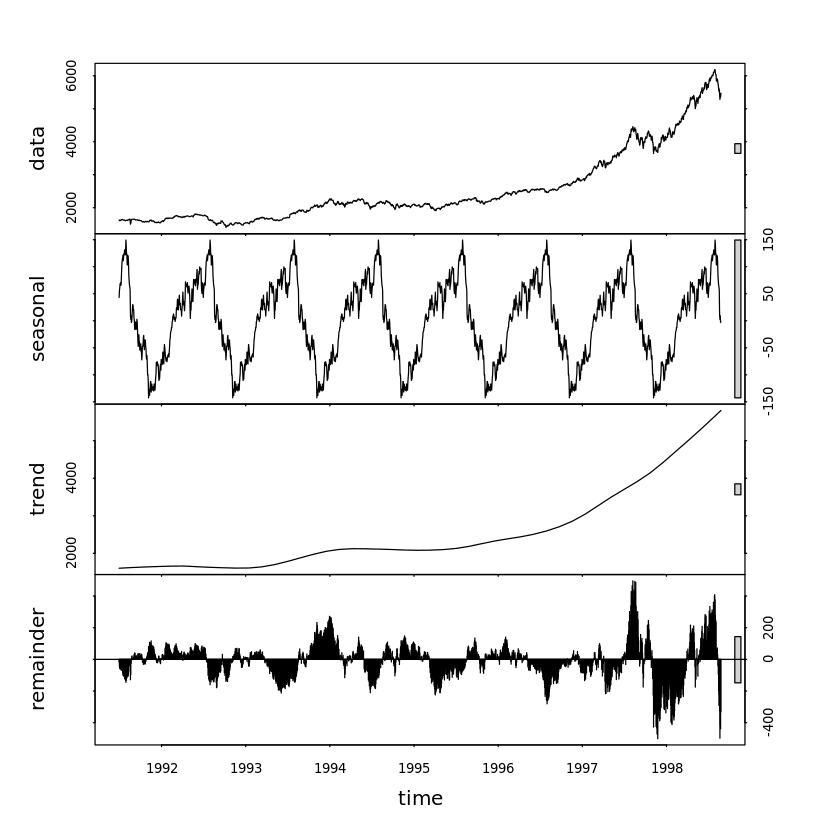

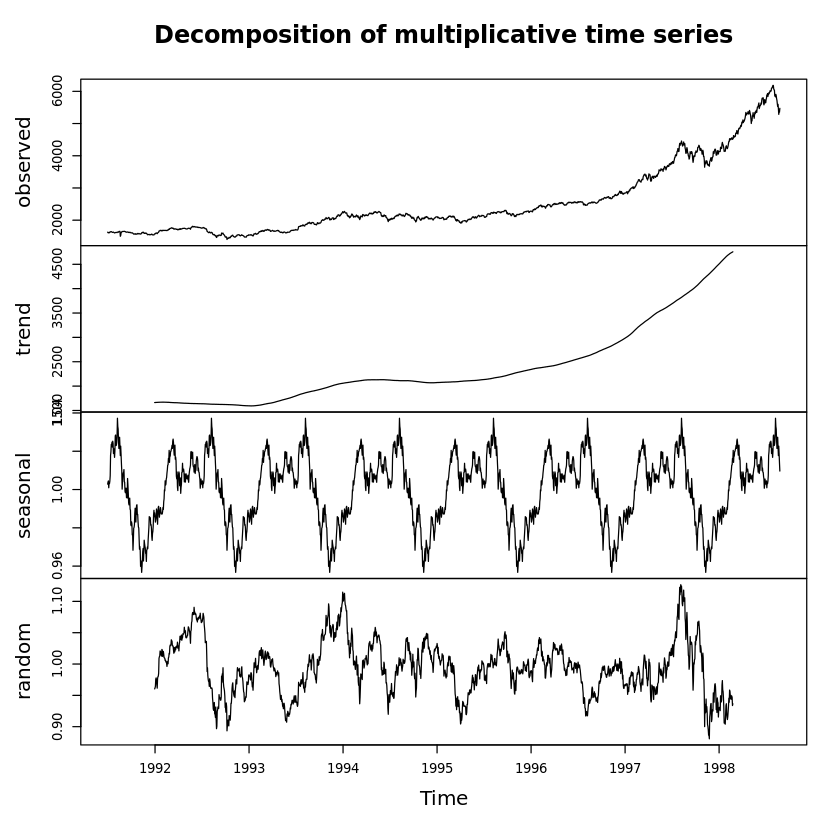

In [16]:
par(mfrow=c(1,2))
plot(stl(tsData,s.window='periodic'))
plot(decompose(tsData,type = 'multiplicative'))

In [17]:
# How to forecast?

# Use standard regression based methods to do forecast?

# If it is regression: we need dependent and independent variables?

# dependent variable is 'tsData' which is known as Yt

# independent predictors: either lag values, or moving average values, or difference values or all or combinations 
# of any sort etc.

In [18]:
head(lag(tsData),10)

[1] 1628.75 1613.63 1606.51 1621.04 1618.16 1610.61 1630.75 1640.17 1635.47
[10] 1645.89

In [19]:
head(lag(tsData,1),10)

[1] 1628.75 1613.63 1606.51 1621.04 1618.16 1610.61 1630.75 1640.17 1635.47
[10] 1645.89

In [20]:
# positive values- shifted to earlier stage, lead
# negative values- shifted to later stage, lag

In [21]:
head(lag(tsData,-1),10)

[1] 1628.75 1613.63 1606.51 1621.04 1618.16 1610.61 1630.75 1640.17 1635.47
[10] 1645.89

In [22]:
head(as.data.frame(tsData),10)

x      
1  1628.75
2  1613.63
3  1606.51
4  1621.04
5  1618.16
6  1610.61
7  1630.75
8  1640.17
9  1635.47
10 1645.89

In [23]:
library(DataCombine)
tsData = EuStockMarkets[,1]

df =as.data.frame(tsData)

df = slide(df,'x',NewVar = 'XLag1',slideBy = -1)
df= slide(df,'x',NewVar = 'XLead1',slideBy = 1)

head(df)


ERROR: Error in library(DataCombine): there is no package called ‘DataCombine’


In [ ]:
# How to identify autocorrelation and partial autocorrelation?
# What is the significance of this?

In [ ]:
par(mfrow=c(2,1))
acf(tsData) #stock prices
acf(AirPassengers) #airpassengers data

In [ ]:
# the acf from both the above graphs indicates that both the time series is not stationary

In [ ]:
par(mfrow=c(2,1))
pacf(tsData) #stock prices
pacf(AirPassengers) #airpassengers data

In [ ]:
#from pacf angle both the graphs looks fine.

In [ ]:
# How to de-trend a time series?
lm(JohnsonJohnson ~c(1:length(JohnsonJohnson)))

In [ ]:
fit <- lm(JohnsonJohnson ~c(1:length(JohnsonJohnson)))

In [ ]:
par(mfrow=c(2,1))
plot(JohnsonJohnson)
plot(resid(fit),type='l')

In [ ]:
#How to deseasonalize a time series?

#1- de-compose the time series
#2- use seasonal adjustment

In [ ]:
tsD1 <- stl(tsData,'periodic')

In [ ]:
tsD2 <- seasadj(tsD1)

In [ ]:
par(mfrow=c(2,1))
plot(tsData)
plot(tsD2)

In [ ]:
par(mfrow=c(2,1))
plot(AirPassengers)
tsD <- stl(AirPassengers,'periodic')
tsD3 <- seasadj(tsD)
plot(tsD3)

In [ ]:
par(mfrow=c(2,1))
seasonplot(tsD3,12)
seasonplot(tsD2,12)

In [ ]:
# Check if the time series is stationary?

# ADF test for stationarity

# Augmented Dickey Fuller Test (ADF test for stationarity)

In [ ]:
# NUll Hypothesis: The time Series is not stationary
# Alternative Hypothesis: The Time Series is Stationary

In [ ]:
library(tseries)

In [ ]:
adf.test(tsData)

In [ ]:
# since the p-value of the ADF test is greater than 0.05, we fail to reject the null hypothesis
# hence the time series is not stationary

In [ ]:
kpss.test(tsData)

In [ ]:
# NUll Hypothesis: The time series is stationary
# Alternate Hypothesis: The time series is not stationary

In [ ]:
# since the p-value of the kpss test is less than 0.05, we have to reject the null hypothesis
# hence the time series is not stationary

In [ ]:
#the test for the AirPassengers data
adf.test(AirPassengers)

In [ ]:
# if the time series is not stationary and how to make it one?

# Differencing is the method to make the time series stationary

In [ ]:
# seasonal differencing
ndiffs(AirPassengers) #number of diff required to make the time series stationary

In [ ]:
AP_SA <- diff(AirPassengers,lag=frequency(AirPassengers),differences = 1)

In [ ]:
AP_SA1 <- diff(AP_SA,differences = 1)

In [ ]:
par(mfrow=c(2,2))
plot(AirPassengers)
plot(AP_SA,type='l')
plot(AP_SA1,type='l')

In [ ]:
ndiffs(AP_SA)

In [ ]:
# maximum diff 2 and that to step by step, 1 at a time, check and proceed

In [ ]:
# remove the trend component from the time series we will be using moving average methods

In [ ]:
# Forecast methods:

In [25]:
# Moving Average
# Weighted Moving Average
# Auto Regressive Method
# Auto Regressive Moving Average Method
# Auto Regressive Integreated Moving Average Method
# Single/Simple Exponential Smoothing Method
# Double Exponential Smoothing
# Tripple Exponential Smoothing
# Neural Network Based Forecasting

In [33]:
ma_12 <- ma(tsData,order=12)
ma_3 <- ma(tsData,order=3)
ma_5 <- ma(tsData,order=5)
ma_7 <- ma(tsData,order=7)

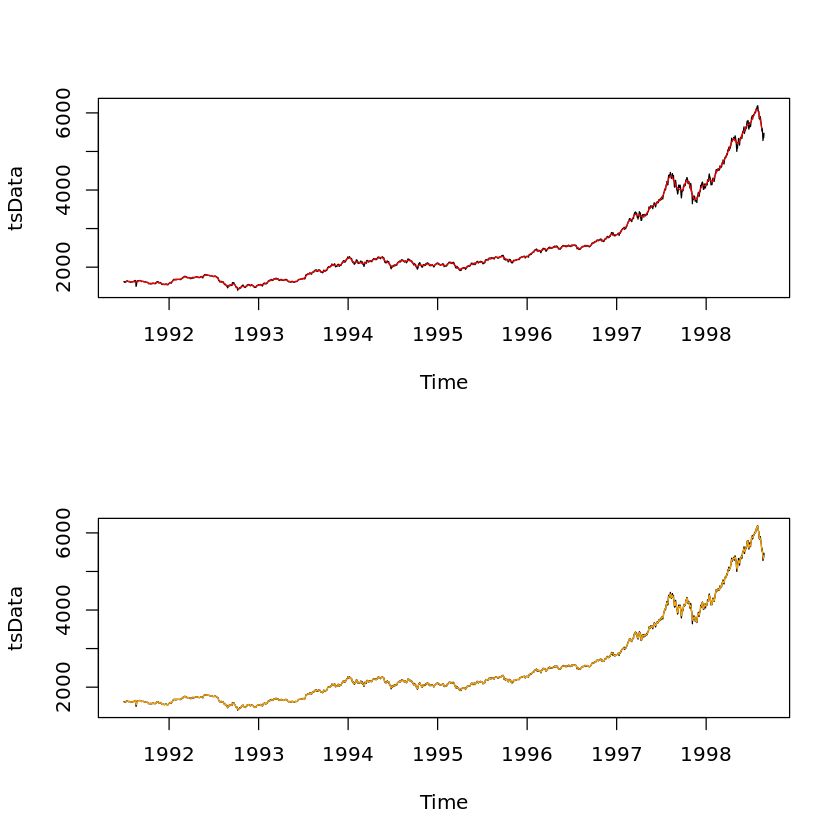

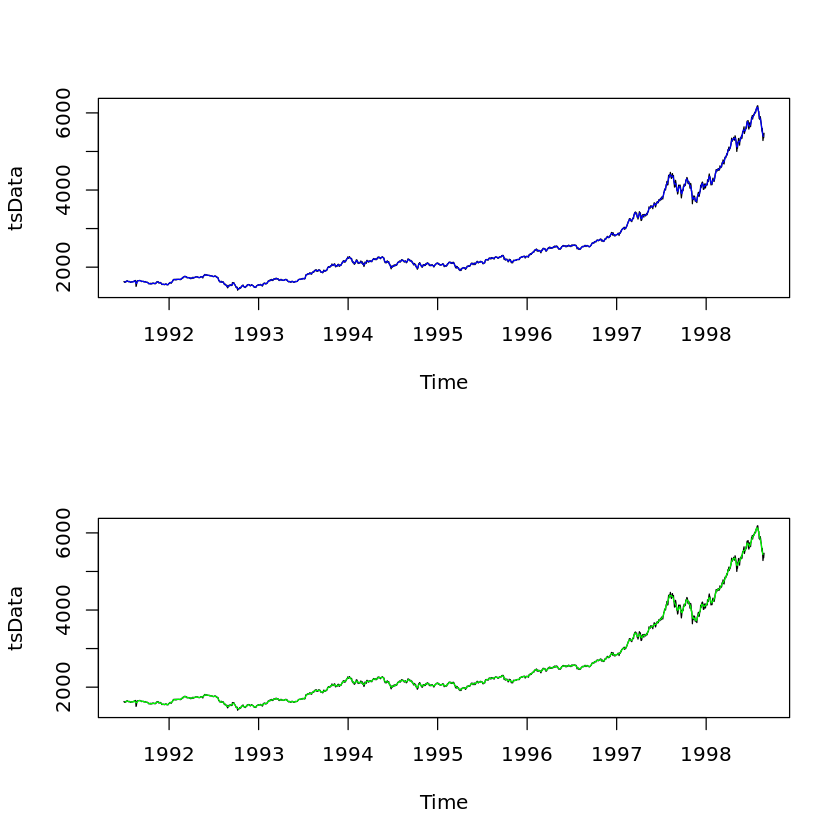

In [36]:
par(mfrow=c(2,1))
plot(tsData)
lines(ma_12,col='red')
plot(tsData)
lines(ma_3,col='orange')
plot(tsData)
lines(ma_5,col='blue')
plot(tsData)
lines(ma_7,col='green')

In [47]:
# Exponential Smoothing Method for forecasting
library(forecast)

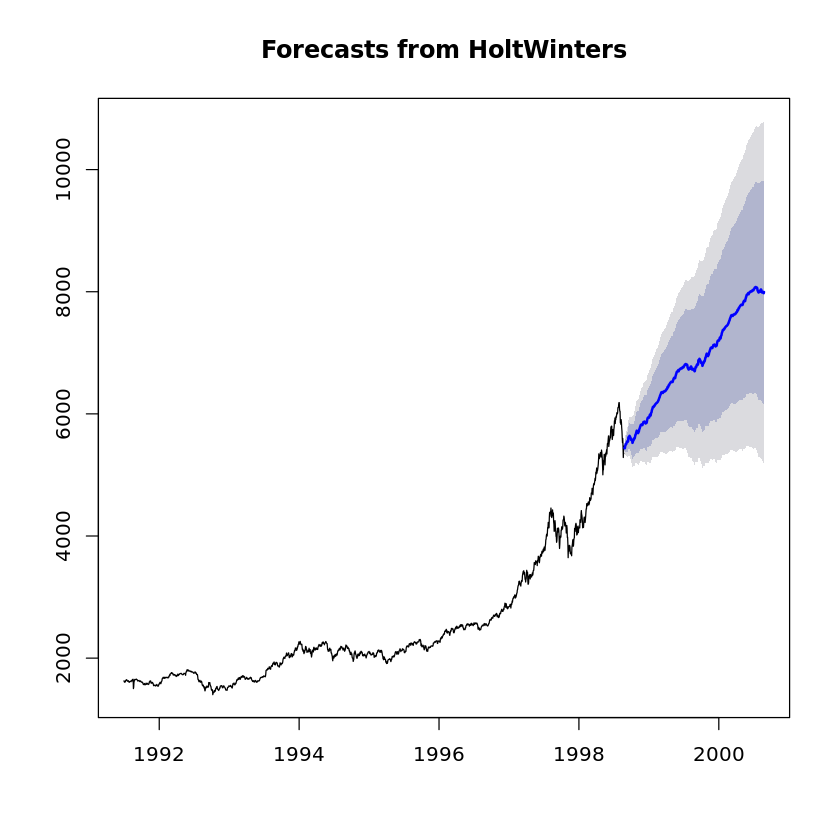

In [63]:
#simple exponential smoothing 
model1<-HoltWinters(tsData,beta=NULL,gamma=NULL)

plot(forecast(model1))

In [59]:
pred <- as.data.frame(forecast(model1))

In [60]:
pred

Point Forecast Lo 80    Hi 80    Lo 95    Hi 95   
1998.650 5446.390       5399.443 5493.336 5374.591 5518.189
1998.654 5436.277       5371.643 5500.911 5337.428 5535.126
1998.658 5440.893       5362.392 5519.395 5320.835 5560.952
1998.662 5472.960       5382.633 5563.288 5334.816 5611.104
1998.665 5487.649       5386.817 5588.481 5333.439 5641.858
1998.669 5506.770       5396.376 5617.163 5337.937 5675.602
1998.673 5499.180       5379.941 5618.419 5316.819 5681.540
1998.677 5505.848       5378.330 5633.366 5310.826 5700.870
1998.681 5524.194       5388.860 5659.528 5317.218 5731.170
1998.685 5536.225       5393.461 5678.990 5317.886 5754.564
1998.688 5547.207       5397.342 5697.072 5318.008 5776.406
1998.692 5551.734       5395.052 5708.416 5312.109 5791.359
1998.696 5538.168       5374.917 5701.419 5288.497 5787.839
1998.700 5548.909       5379.309 5718.510 5289.528 5808.291
1998.704 5552.896       5377.142 5728.650 5284.103 5821.689
1998.708 5617.023       5435.290 5798.755 5339.087 5894.959
1998.712 5617.087       5429.535 5804.639 5330.251 5903.923
1998.715 5626.524       5433.296 5819.751 5331.008 5922.039
1998.719 5621.360       5422.589 5820.131 5317.366 5925.354
1998.723 5641.411       5437.217 5845.604 5329.124 5953.698
1998.727 5634.711       5425.206 5844.215 5314.301 5955.120
1998.731 5627.060       5412.348 5841.773 5298.686 5955.435
1998.735 5609.097       5389.272 5828.921 5272.904 5945.289
1998.738 5609.795       5384.947 5834.642 5265.920 5953.669
1998.742 5589.289       5359.502 5819.076 5237.860 5940.718
1998.746 5574.354       5339.705 5809.004 5215.490 5933.219
1998.750 5571.386       5331.948 5810.824 5205.198 5937.575
1998.754 5566.556       5322.399 5810.714 5193.149 5939.964
1998.758 5571.326       5322.513 5820.139 5190.799 5951.853
1998.762 5578.625       5325.217 5832.032 5191.072 5966.178
⋮        ⋮              ⋮        ⋮        ⋮        ⋮       
2000.535 8064.311       6334.661 9793.960 5419.040 10709.58
2000.538 8066.319       6333.327 9799.312 5415.936 10716.70
2000.542 8070.475       6334.137 9806.812 5414.976 10725.97
2000.546 8067.173       6327.489 9806.857 5406.556 10727.79
2000.550 8057.354       6314.323 9800.386 5391.617 10723.09
2000.554 8022.840       6276.459 9769.221 5351.980 10693.70
2000.558 8011.936       6262.204 9761.668 5335.951 10687.92
2000.562 8006.549       6253.464 9759.633 5325.437 10687.66
2000.565 7992.043       6235.604 9748.482 5305.802 10678.28
2000.569 7986.928       6227.134 9746.723 5295.555 10678.30
2000.573 7994.672       6231.520 9757.824 5298.164 10691.18
2000.577 8007.176       6240.665 9773.687 5305.531 10708.82
2000.581 8013.633       6243.762 9783.504 5306.848 10720.42
2000.585 8009.798       6236.565 9783.031 5297.872 10721.72
2000.588 8010.484       6233.887 9787.080 5293.414 10727.55
2000.592 7999.736       6219.774 9779.697 5277.519 10721.95
2000.596 8016.203       6232.875 9799.531 5288.838 10743.57
2000.600 8037.383       6250.687 9824.080 5304.867 10769.90
2000.604 8038.014       6247.947 9828.080 5300.344 10775.68
2000.608 8031.046       6237.609 9824.484 5288.220 10773.87
2000.612 8008.410       6211.600 9805.221 5260.426 10756.39
2000.615 7996.263       6196.078 9796.448 5243.118 10749.41
2000.619 7986.853       6183.292 9790.414 5228.545 10745.16
2000.623 7990.117       6183.178 9797.055 5226.643 10753.59
2000.627 8001.957       6191.639 9812.275 5233.315 10770.60
2000.631 7996.645       6182.947 9810.344 5222.833 10770.46
2000.635 7990.346       6173.266 9807.427 5211.361 10769.33
2000.638 7990.997       6170.533 9811.462 5206.837 10775.16
2000.642 7976.669       6152.819 9800.519 5187.331 10766.01
2000.646 7996.554       6169.317 9823.791 5202.036 10791.07

In [62]:
as.data.frame(tsData)

x      
1    1628.75
2    1613.63
3    1606.51
4    1621.04
5    1618.16
6    1610.61
7    1630.75
8    1640.17
9    1635.47
10   1645.89
11   1647.84
12   1638.35
13   1629.93
14   1621.49
15   1624.74
16   1627.63
17   1631.99
18   1621.18
19   1613.42
20   1604.95
21   1605.75
22   1616.67
23   1619.29
24   1620.49
25   1619.67
26   1623.07
27   1613.98
28   1631.87
29   1630.37
30   1633.47
⋮    ⋮      
1831 5942.06
1832 5975.88
1833 6018.89
1834 6000.84
1835 6001.24
1836 6023.31
1837 6101.90
1838 6106.10
1839 6108.00
1840 6162.86
1841 6186.09
1842 6184.10
1843 6081.11
1844 6043.82
1845 6040.58
1846 5854.35
1847 5867.52
1848 5828.74
1849 5906.33
1850 5861.19
1851 5774.38
1852 5718.70
1853 5614.77
1854 5528.12
1855 5598.32
1856 5460.43
1857 5285.78
1858 5386.94
1859 5355.03
1860 5473.72

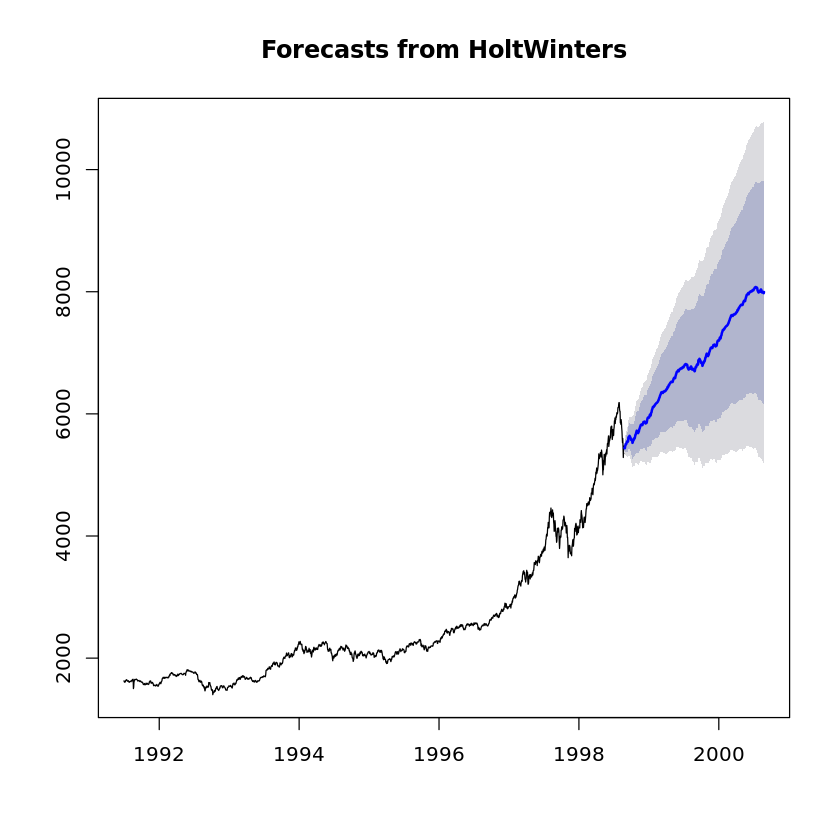

In [64]:
#double exponential smoothing model
model2<-HoltWinters(tsData,gamma=NULL)

plot(forecast(model2))

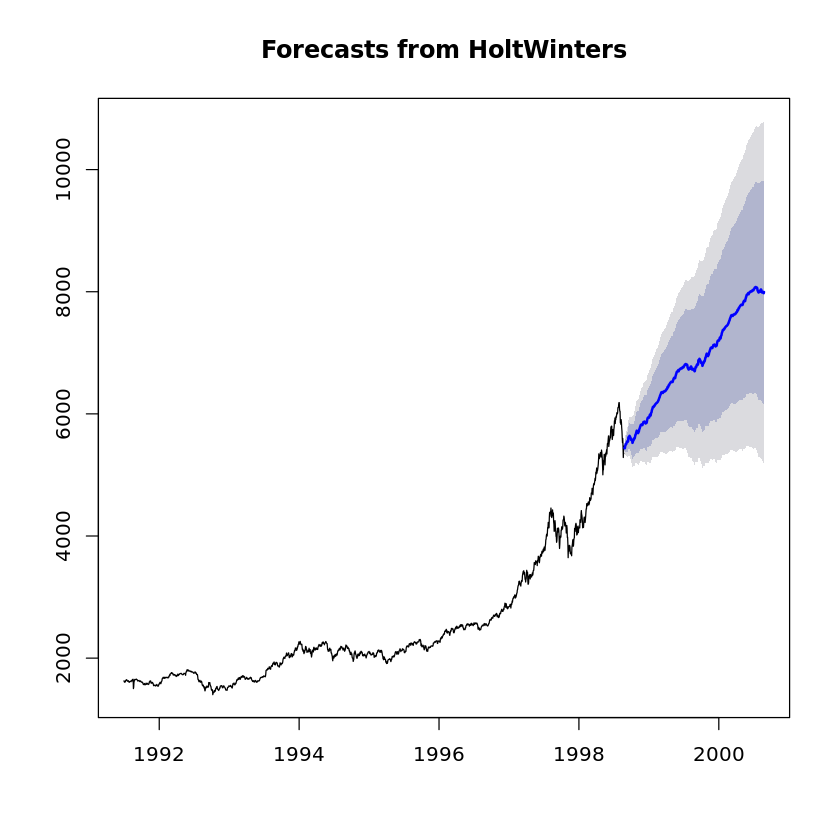

In [65]:
#tripple exponential smoothing method
model3<-HoltWinters(tsData)

plot(forecast(model3))

In [69]:
#MAPE metric to compare the accuracy of any time series model
model1$SSE
model2$SSE
model3$SSE

[1] 2147960

[1] 2147960

[1] 2147960

In [71]:
forecast.HoltWinters(model1,h=12)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1998.650       5446.390 5399.443 5493.336 5374.591 5518.189
1998.654       5436.277 5371.643 5500.911 5337.428 5535.126
1998.658       5440.893 5362.392 5519.395 5320.835 5560.952
1998.662       5472.960 5382.633 5563.288 5334.816 5611.104
1998.665       5487.649 5386.817 5588.481 5333.439 5641.858
1998.669       5506.770 5396.376 5617.163 5337.937 5675.602
1998.673       5499.180 5379.941 5618.419 5316.819 5681.540
1998.677       5505.848 5378.330 5633.366 5310.826 5700.870
1998.681       5524.194 5388.860 5659.528 5317.218 5731.170
1998.685       5536.225 5393.461 5678.990 5317.886 5754.564
1998.688       5547.207 5397.342 5697.072 5318.008 5776.406
1998.692       5551.734 5395.052 5708.416 5312.109 5791.359

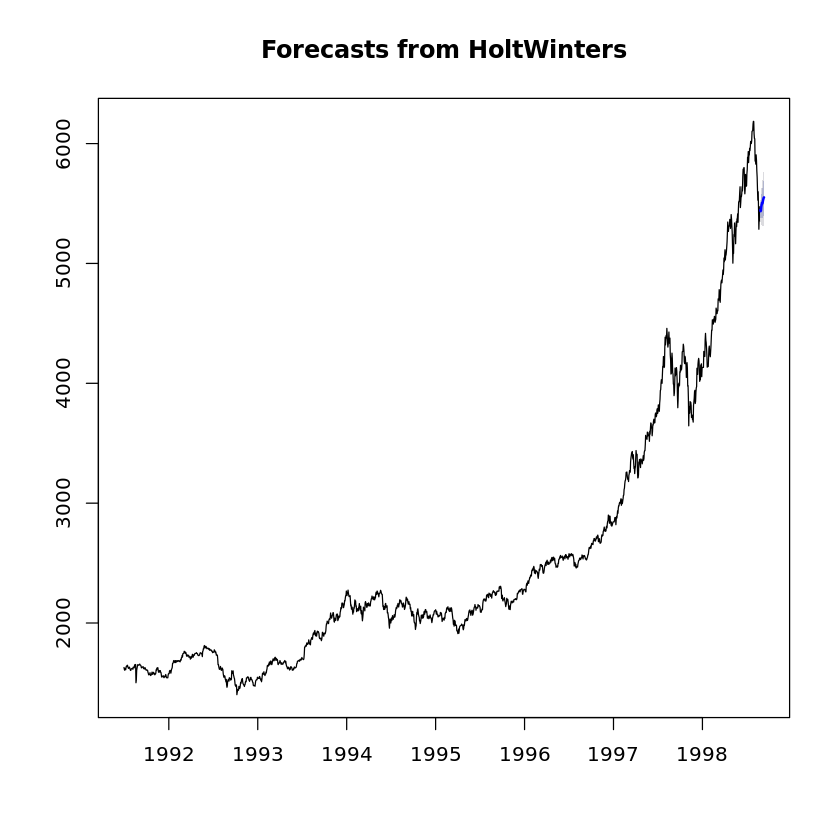

In [72]:
plot.forecast(forecast.HoltWinters(model1,h=12))

In [75]:
output1<-forecast.HoltWinters(model1,h=12)

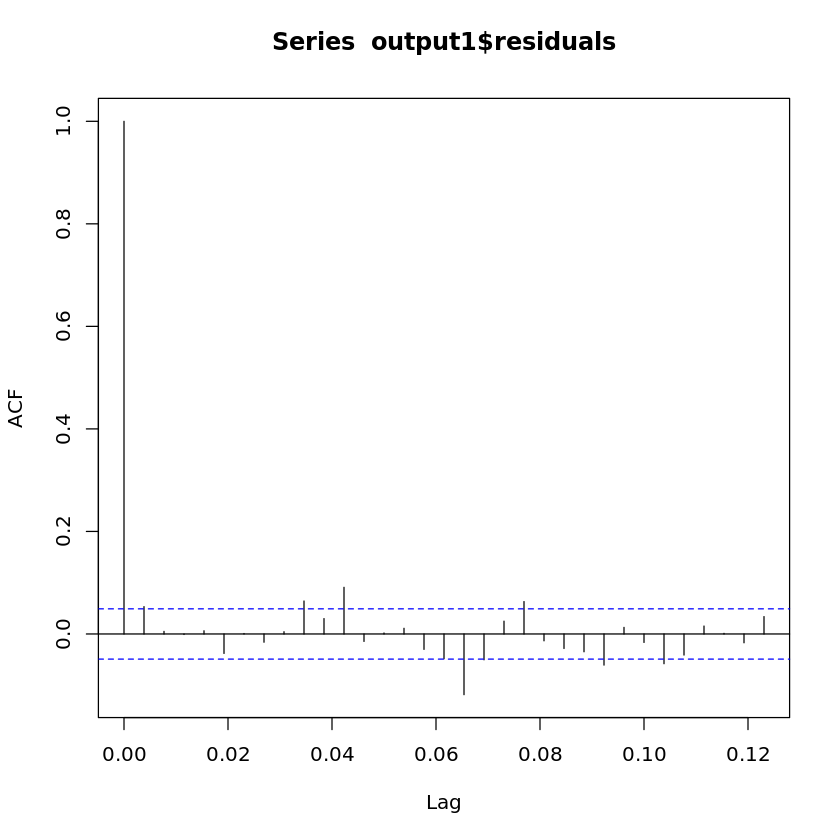

In [76]:
acf(output1$residuals)

In [77]:
library(tseries)
adf.test(output1$residuals)

Warning message in adf.test(output1$residuals):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  output1$residuals
Dickey-Fuller = -10.01, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


In [79]:
fcast1<-forecast(model1,12)
fcast2<-forecast(model2,12)
fcast3<-forecast(model3,12)

In [80]:
fcast1$mean

Time Series:
Start = c(1998, 170) 
End = c(1998, 181) 
Frequency = 260 
 [1] 5446.390 5436.277 5440.893 5472.960 5487.649 5506.770 5499.180 5505.848
 [9] 5524.194 5536.225 5547.207 5551.734

In [81]:
fcast2$mean

Time Series:
Start = c(1998, 170) 
End = c(1998, 181) 
Frequency = 260 
 [1] 5446.390 5436.277 5440.893 5472.960 5487.649 5506.770 5499.180 5505.848
 [9] 5524.194 5536.225 5547.207 5551.734

In [82]:
fcast3$mean

Time Series:
Start = c(1998, 170) 
End = c(1998, 181) 
Frequency = 260 
 [1] 5446.390 5436.277 5440.893 5472.960 5487.649 5506.770 5499.180 5505.848
 [9] 5524.194 5536.225 5547.207 5551.734

# ARIMA - Auto regressive integrated moving average model

In [85]:
EuStockMarkets[1:10,]

DAX     SMI    CAC    FTSE  
 [1,] 1628.75 1678.1 1772.8 2443.6
 [2,] 1613.63 1688.5 1750.5 2460.2
 [3,] 1606.51 1678.6 1718.0 2448.2
 [4,] 1621.04 1684.1 1708.1 2470.4
 [5,] 1618.16 1686.6 1723.1 2484.7
 [6,] 1610.61 1671.6 1714.3 2466.8
 [7,] 1630.75 1682.9 1734.5 2487.9
 [8,] 1640.17 1703.6 1757.4 2508.4
 [9,] 1635.47 1697.5 1754.0 2510.5
[10,] 1645.89 1716.3 1754.3 2497.4

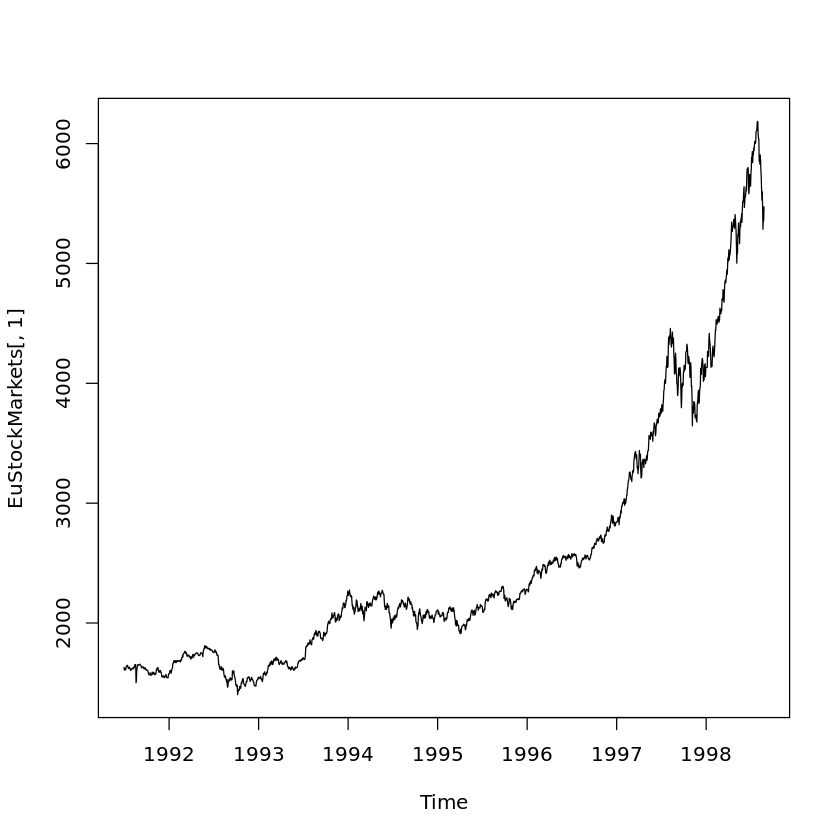

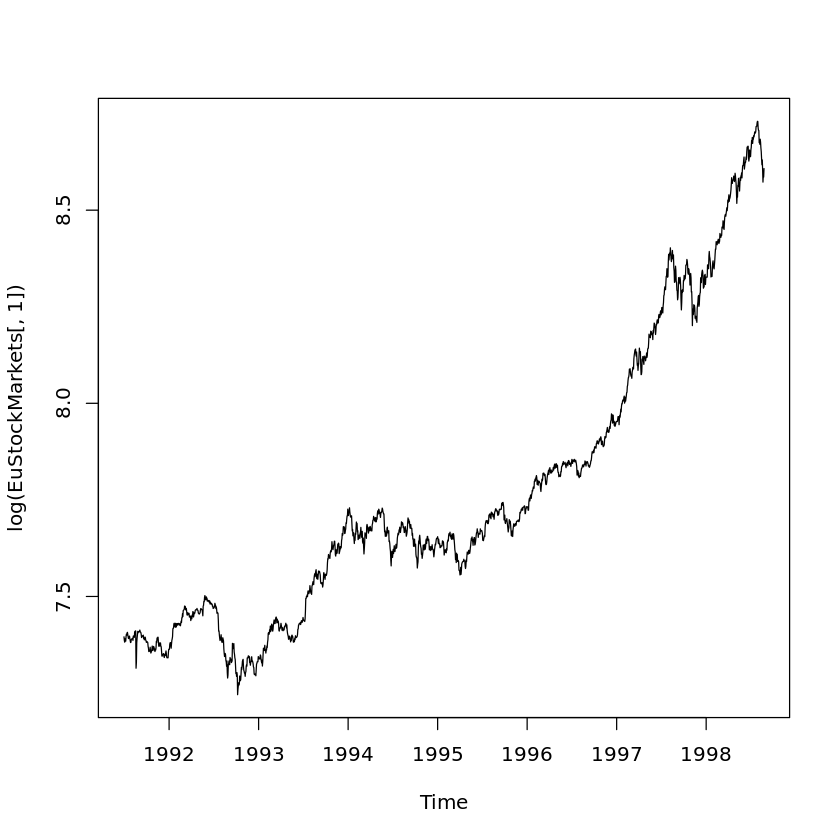

In [88]:
#Steps in ARIMA

#1- Plot the series and understand the components
plot(EuStockMarkets[,1])
plot(log(EuStockMarkets[,1]))

In [89]:
#step 2:- decompose the time series


In [90]:
#Step 3:- check for stationarity
adf.test(EuStockMarkets[,1])


	Augmented Dickey-Fuller Test

data:  EuStockMarkets[, 1]
Dickey-Fuller = -0.82073, Lag order = 12, p-value = 0.9598
alternative hypothesis: stationary


In [91]:
adf.test(log(EuStockMarkets[,1]))


	Augmented Dickey-Fuller Test

data:  log(EuStockMarkets[, 1])
Dickey-Fuller = -1.3702, Lag order = 12, p-value = 0.8449
alternative hypothesis: stationary


In [93]:
adf.test(log(log(EuStockMarkets[,1])))


	Augmented Dickey-Fuller Test

data:  log(log(EuStockMarkets[, 1]))
Dickey-Fuller = -1.4946, Lag order = 12, p-value = 0.7923
alternative hypothesis: stationary


In [95]:
# AR- p
# I- d
# MA- q

#ARIMA(p,d,q)

In [96]:
# Yt = C + beta1*Yt-t + beta2*Yt-2 + error t
# ARIMA (2,0,0)
# AR Model

In [97]:
#ARIMA (2,1,2)

In [98]:
# ARIMA(p,d,q,P,D,Q)

In [111]:
data = data.frame(Yt=EuStockMarkets[,1])
head(data)

Yt     
1 1628.75
2 1613.63
3 1606.51
4 1621.04
5 1618.16
6 1610.61

In [120]:
ma_7 <- data.frame(ma_7 = ma(EuStockMarkets[,1],order=7))

In [123]:
library(ggplot2)

In [125]:
# decompose the time series data
decomp = stl(data$Yt,s.window = 'periodic')

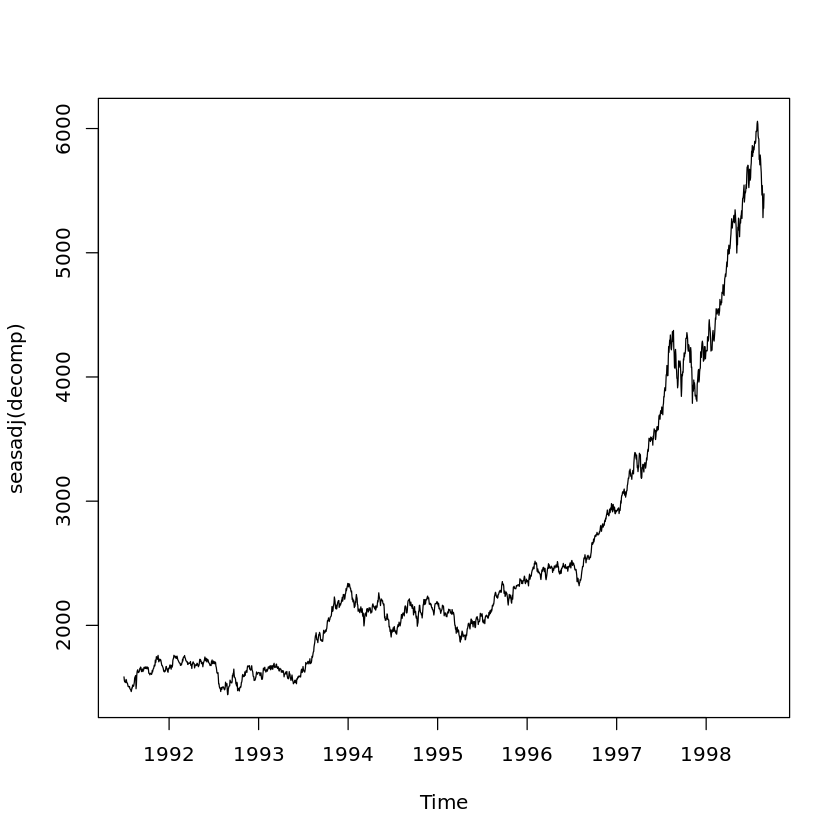

In [127]:
plot(seasadj(decomp))

In [128]:
adf.test(EuStockMarkets[,1])


	Augmented Dickey-Fuller Test

data:  EuStockMarkets[, 1]
Dickey-Fuller = -0.82073, Lag order = 12, p-value = 0.9598
alternative hypothesis: stationary


In [129]:
adf.test(log(EuStockMarkets[,1]))


	Augmented Dickey-Fuller Test

data:  log(EuStockMarkets[, 1])
Dickey-Fuller = -1.3702, Lag order = 12, p-value = 0.8449
alternative hypothesis: stationary


In [143]:
head(data.frame(ma(EuStockMarkets[,1],order=7)))

ma.EuStockMarkets...1...order...7.
1       NA                          
2       NA                          
3       NA                          
4 1618.493                          
5 1620.124                          
6 1623.244

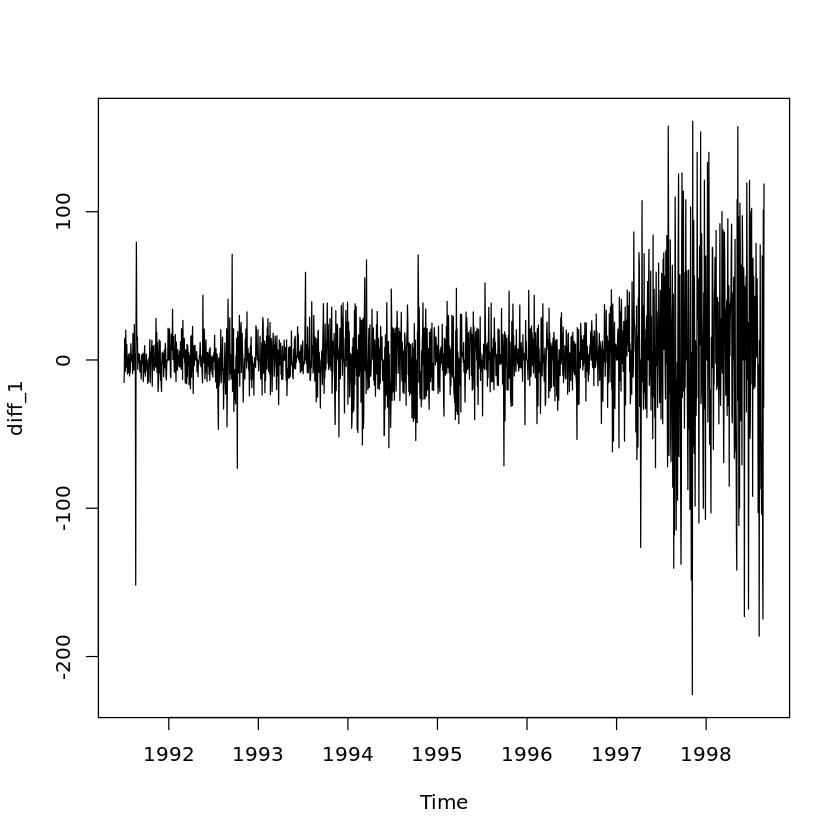

In [146]:
diff_1 = diff(EuStockMarkets[,1],differences = 1)
plot(diff_1)

In [147]:
adf.test(diff_1)

Warning message in adf.test(diff_1):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  diff_1
Dickey-Fuller = -9.9997, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


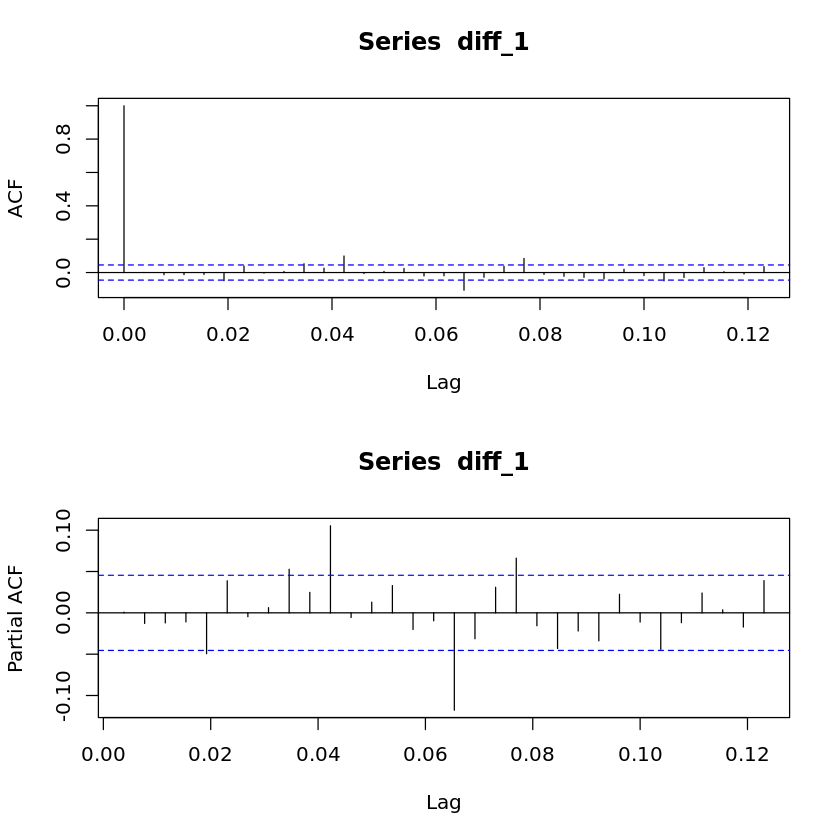

In [151]:
par(mfrow=c(2,1))
acf(diff_1)
pacf(diff_1)

In [152]:
auto.arima(EuStockMarkets[,1])

Warning message in auto.arima(EuStockMarkets[, 1]):
“Unable to fit final model using maximum likelihood. AIC value approximated”

Series: EuStockMarkets[, 1] 
ARIMA(2,2,1)                    

Coefficients:
          ar1      ar2      ma1
      -0.0088  -0.0253  -0.9899
s.e.   0.0233   0.0233   0.0035

sigma^2 estimated as 1065:  log likelihood=-9112.25
AIC=18218.04   AICc=18218.06   BIC=18240.15

In [153]:
accuracy(auto.arima(EuStockMarkets[,1]))

Warning message in auto.arima(EuStockMarkets[, 1]):
“Unable to fit final model using maximum likelihood. AIC value approximated”

ME         RMSE     MAE      MPE         MAPE      MASE      
Training set -0.5566461 32.60025 20.42285 -0.03927937 0.7506423 0.03715837
             ACF1       
Training set 0.006738465

In [154]:
accuracy(auto.arima(EuStockMarkets[,1],seasonal = F))

Warning message in auto.arima(EuStockMarkets[, 1], seasonal = F):
“Unable to fit final model using maximum likelihood. AIC value approximated”

ME        RMSE     MAE      MPE        MAPE      MASE      
Training set 0.9208606 32.62391 20.48216 0.05258686 0.7532461 0.03726629
             ACF1        
Training set -0.001681192

In [155]:
accuracy(auto.arima(EuStockMarkets[,1],seasonal = T))

Warning message in auto.arima(EuStockMarkets[, 1], seasonal = T):
“Unable to fit final model using maximum likelihood. AIC value approximated”

ME         RMSE     MAE      MPE         MAPE      MASE      
Training set -0.5566461 32.60025 20.42285 -0.03927937 0.7506423 0.03715837
             ACF1       
Training set 0.006738465

In [157]:
model4 <- auto.arima(EuStockMarkets[,1])

Warning message in auto.arima(EuStockMarkets[, 1]):
“Unable to fit final model using maximum likelihood. AIC value approximated”

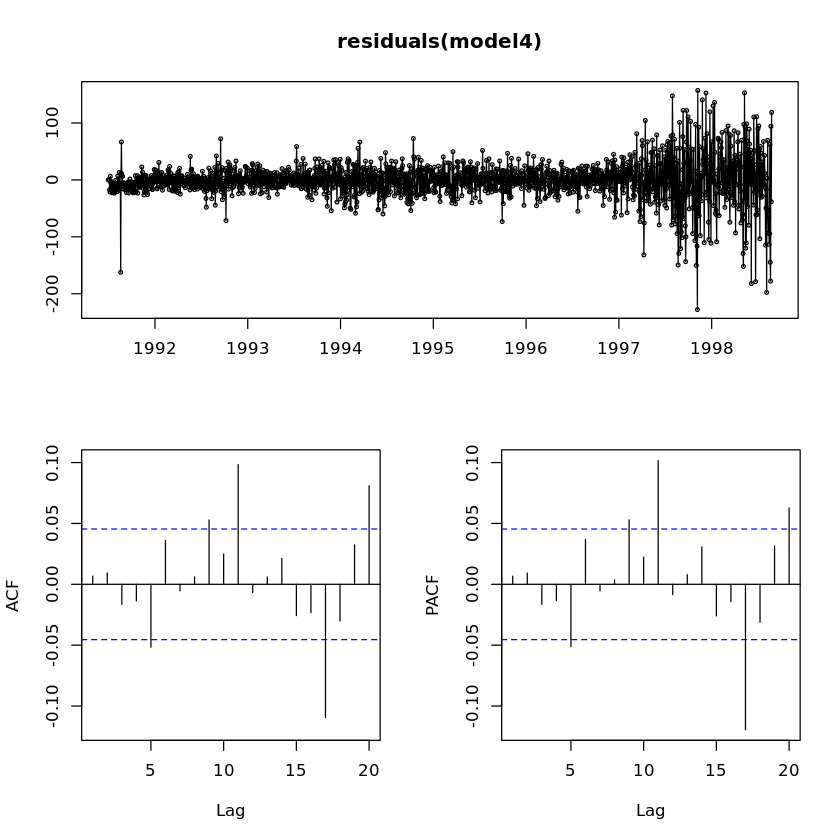

In [158]:
tsdisplay(residuals(model4),lag.max=20)

In [163]:
model5 <- arima(EuStockMarkets[,1],order=c(1,1,1))

In [164]:
accuracy(model5)

ME       RMSE     MAE      MPE        MAPE      MASE    
Training set 2.058394 32.54518 20.22172 0.05961188 0.7374816 1.000038
             ACF1        
Training set -0.003926533

In [165]:
accuracy(model4)

ME         RMSE     MAE      MPE         MAPE      MASE      
Training set -0.5566461 32.60025 20.42285 -0.03927937 0.7506423 0.03715837
             ACF1       
Training set 0.006738465

In [170]:
model6 <- arima(EuStockMarkets[,1],order=c(1,2,1))

In [171]:
accuracy(model6)

ME        RMSE     MAE      MPE        MAPE      MASE     
Training set 0.8260355 32.47397 20.18144 0.02447138 0.7363902 0.9980457
             ACF1        
Training set -0.001049587

In [172]:
model7 <- arima(EuStockMarkets[,1],order=c(1,2,5))

In [173]:
accuracy(model7)

ME       RMSE   MAE      MPE        MAPE      MASE     
Training set 0.820691 32.457 20.16276 0.02443615 0.7358715 0.9971222
             ACF1        
Training set -0.001425905

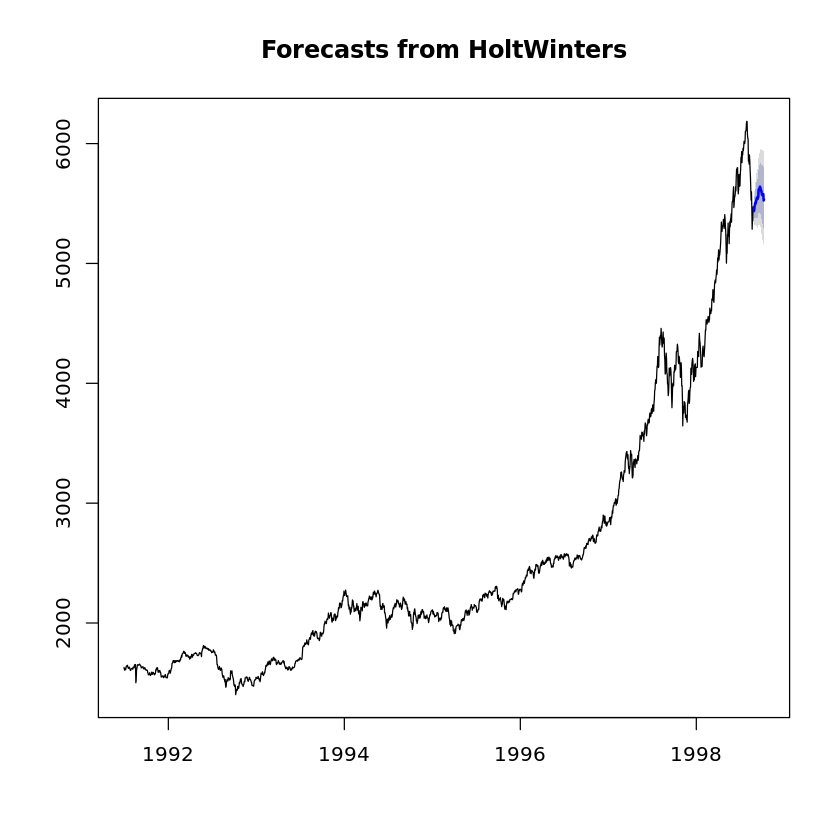

In [176]:
# forecast for the future
fcast<- forecast(model1,h=32)
plot(fcast)

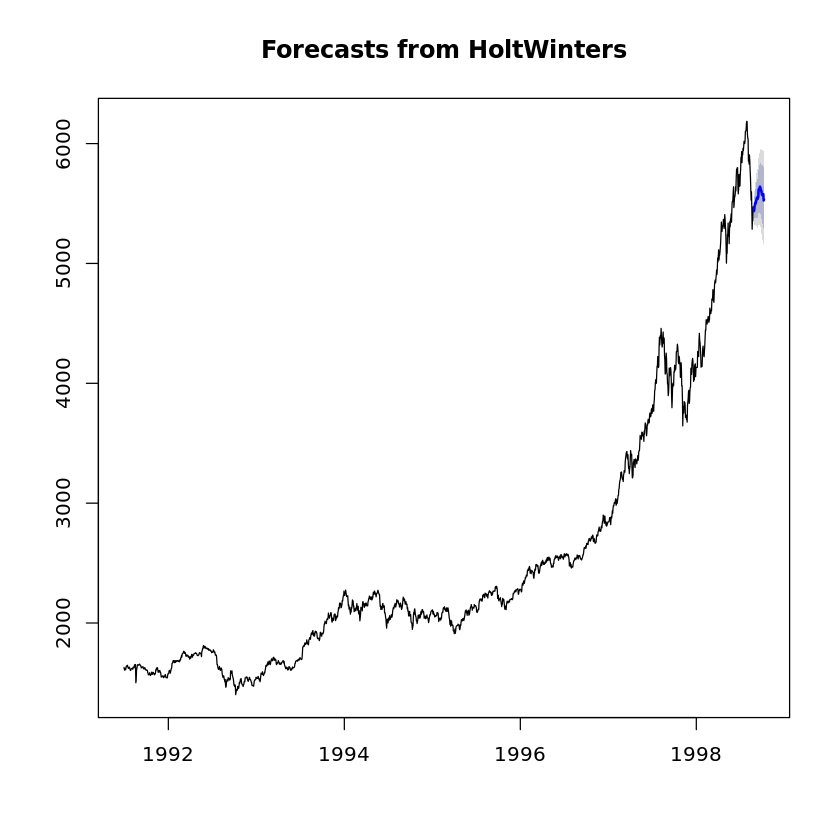

In [177]:
fcast<- forecast(model2,h=32)
plot(fcast)

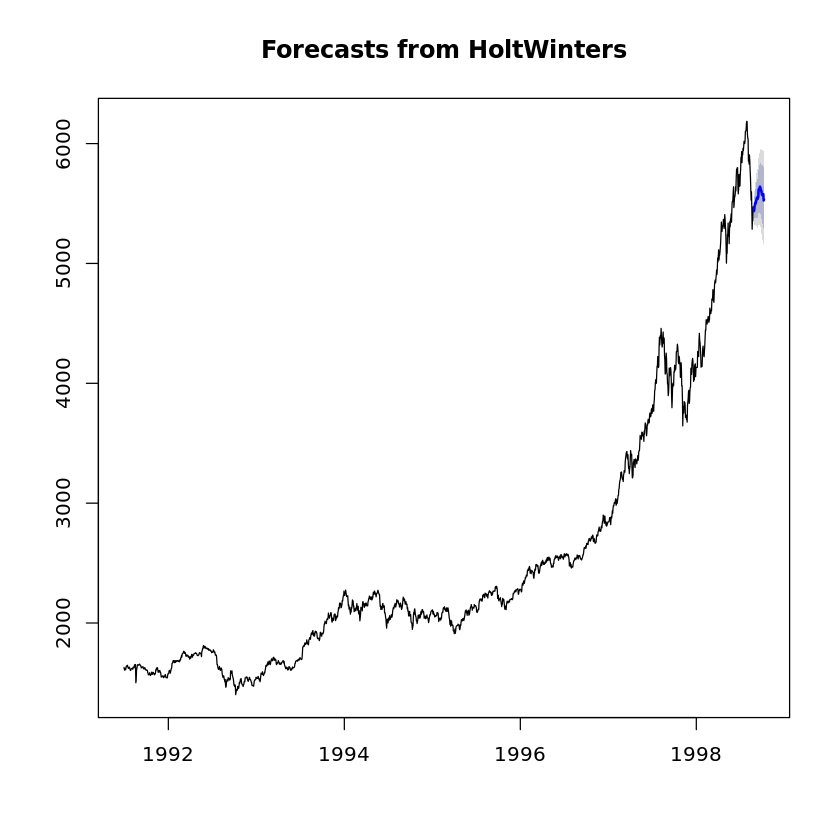

In [178]:
fcast<- forecast(model3,h=32)
plot(fcast)

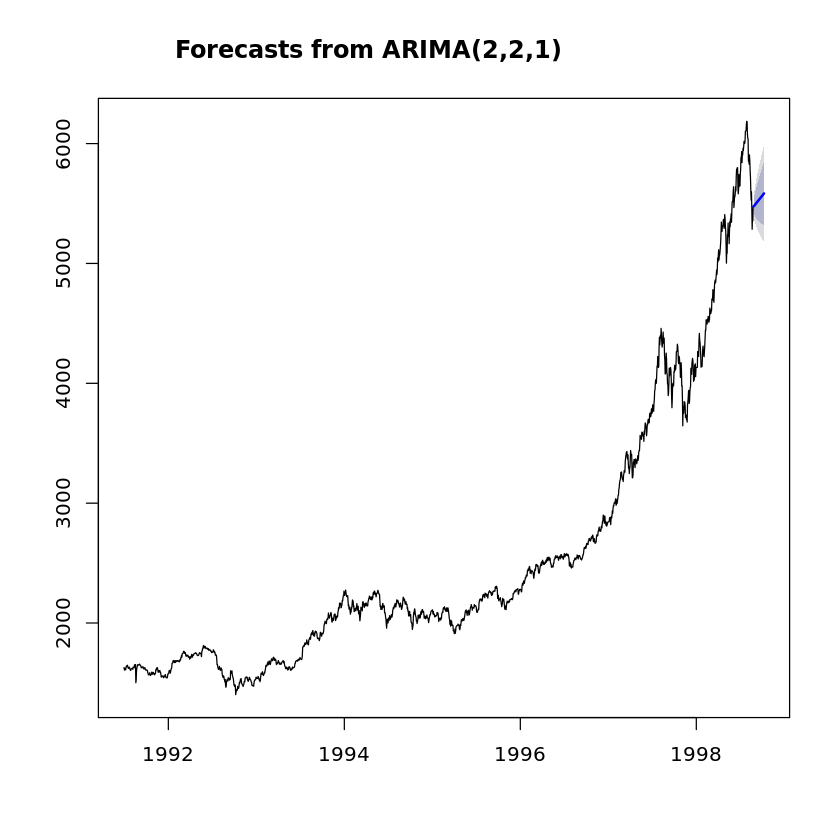

In [179]:
fcast<- forecast(model4,h=32)
plot(fcast)

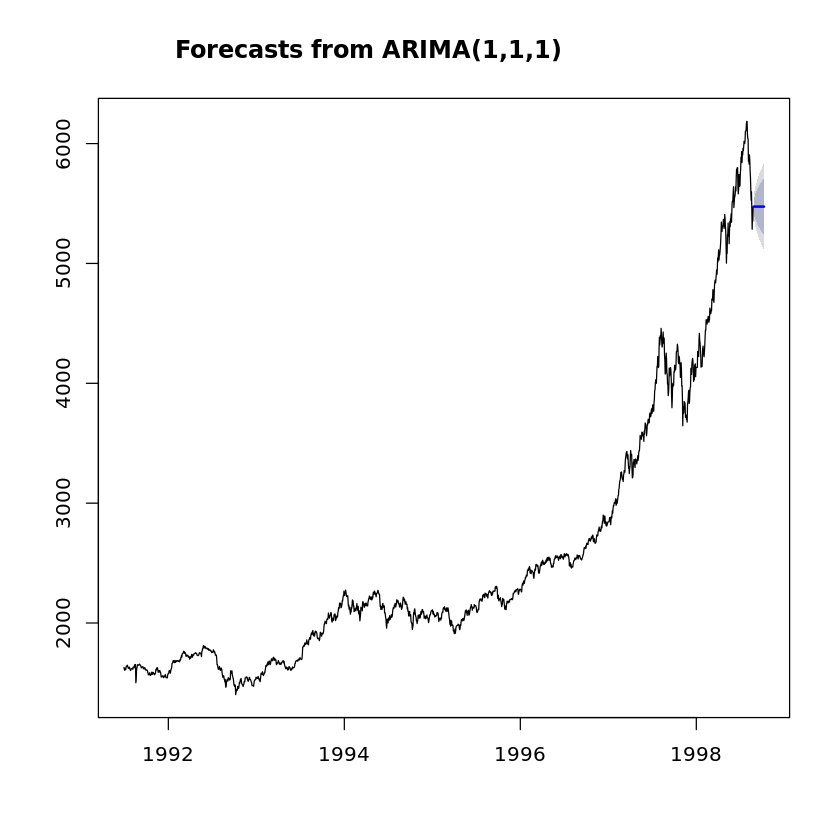

In [180]:
fcast<- forecast(model5,h=32)
plot(fcast)

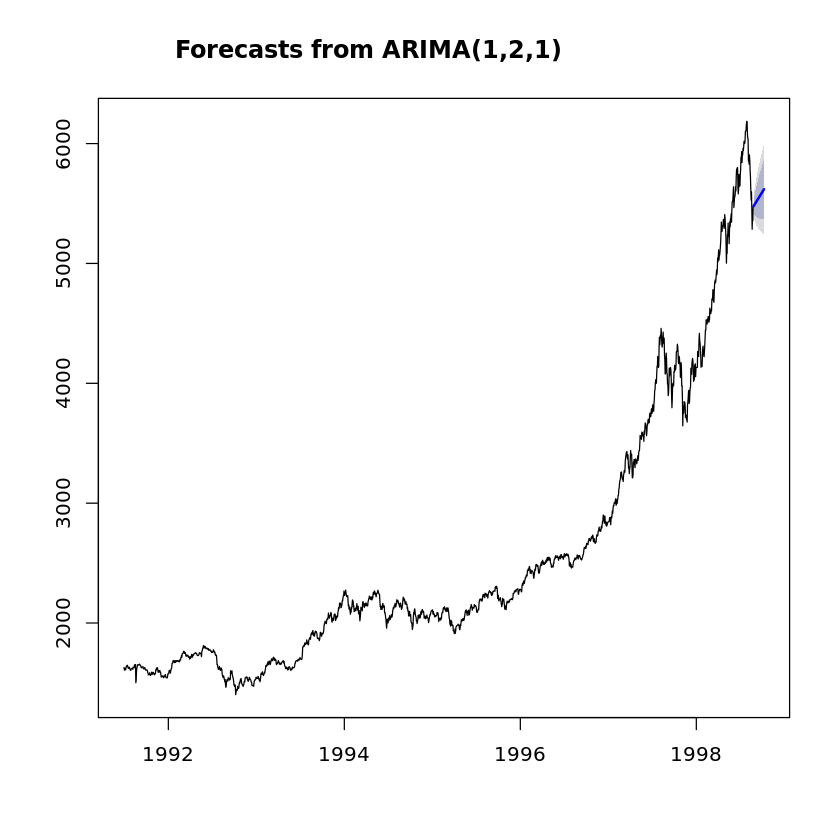

In [181]:
fcast<- forecast(model6,h=32)
plot(fcast)

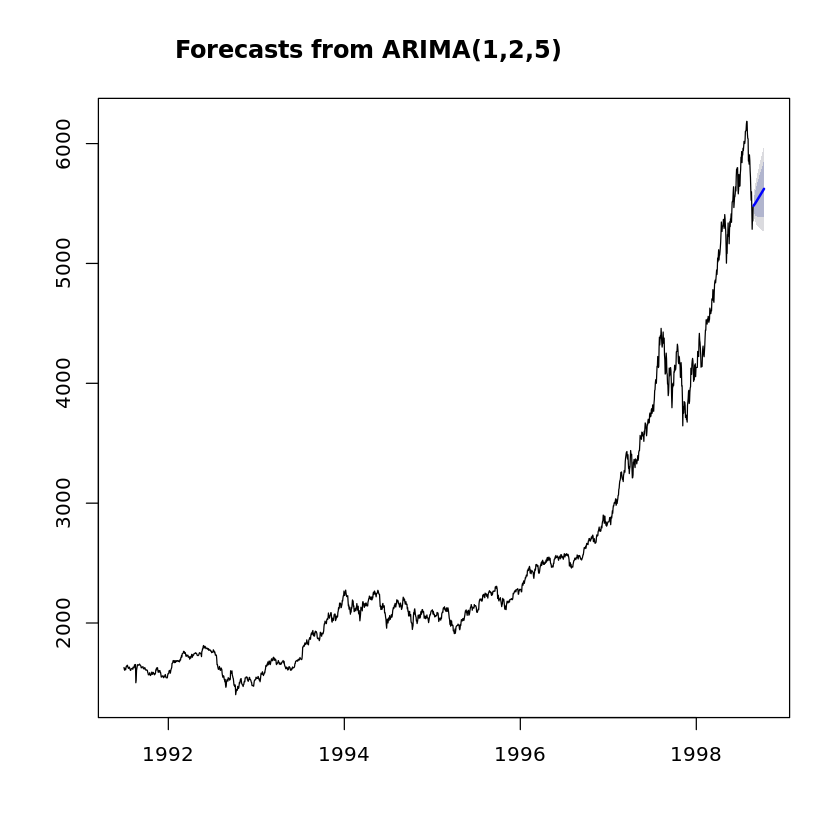

In [182]:
fcast<- forecast(model7,h=32)
plot(fcast)

In [183]:
# you can create seasonal dummy variables as indicator variables
seasonaldummy()

ERROR: Error in is.ts(x): argument "x" is missing, with no default


In [184]:
# box-cox transformation to make the series stationary
BoxCox()

ERROR: Error in BoxCox(): argument "lambda" is missing, with no default


# Neural Network Based Forecasting

In [186]:
library(neuralnet)
library(grid)
library(MASS)

In [187]:
nnetar(EuStockMarkets[,1],p=12,P=,size=10,repeats = 10,lambda = 0)

Series: EuStockMarkets[, 1] 
Model:  NNAR(12,1,10) 
Call:   nnetar(x = EuStockMarkets[, 1], p = 12, size = 10, repeats = 10, 
    lambda = 0)

Average of 10 networks, each of which is
a 13-10-1 network with 151 weights
options were - linear output units 

sigma^2 estimated as 22009

In [188]:
model10 <- nnetar(EuStockMarkets[,1],p=12,P=,size=10,repeats = 10,lambda = 0)

In [190]:
fcast10 <- forecast(model10,32)

Warning message in max(x$upper):
“no non-missing arguments to max; returning -Inf”

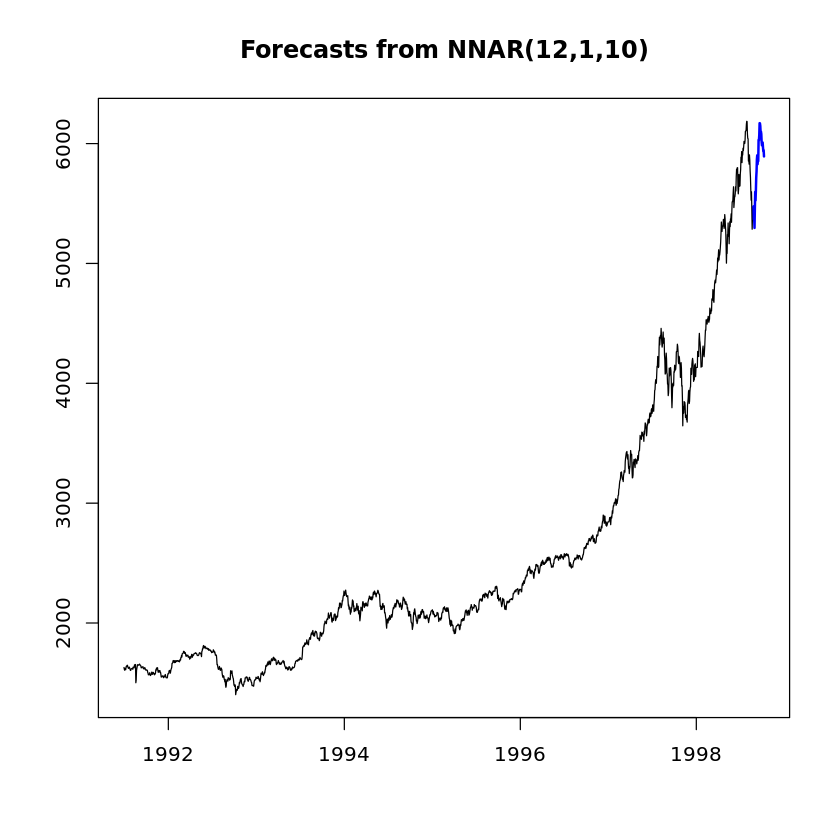

In [192]:
plot(fcast10)

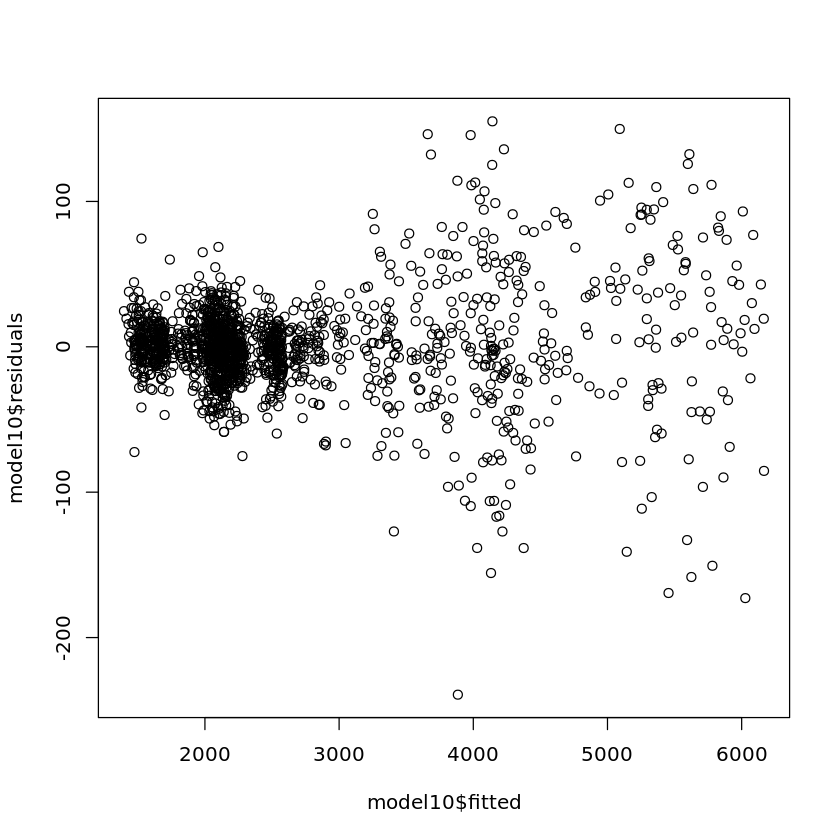

In [195]:
plot(model10$fitted,model10$residuals)

In [ ]:
# hyperparameter tuning to increase the model accuracy

# p= lags
# P= seasonal lags
# size= number of neurons in the hidden layer
# lambda = learning rate
# repeats = backpropagation

In [200]:
model11 <- nnetar(EuStockMarkets[,1],p=20,P=,size=40,repeats = 10,lambda = 0)

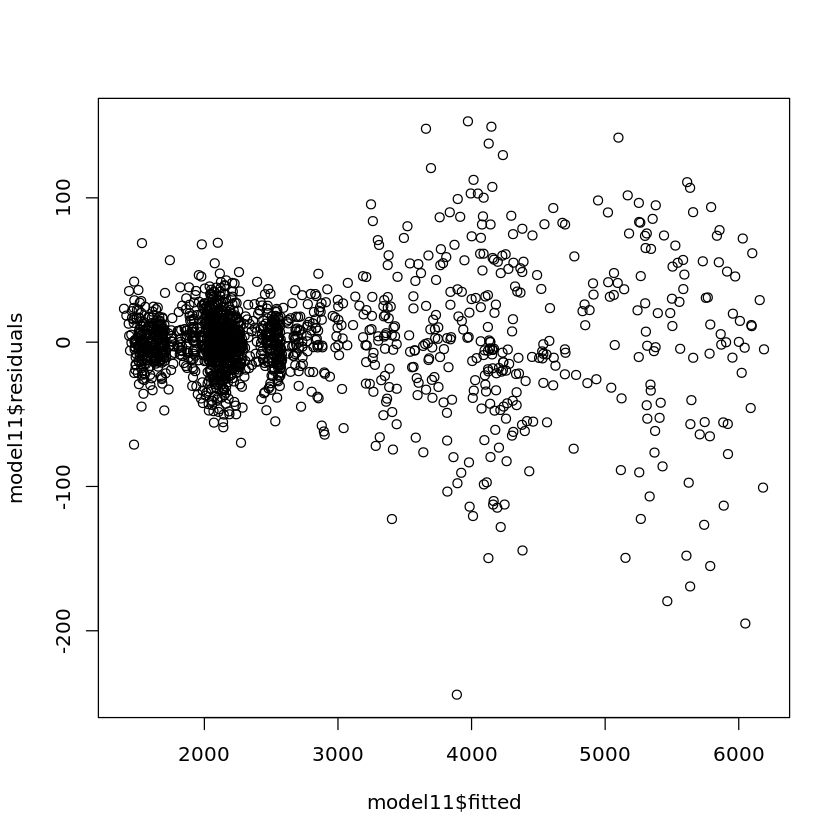

In [201]:
plot(model11$fitted,model11$residuals)

Warning message in max(x$upper):
“no non-missing arguments to max; returning -Inf”

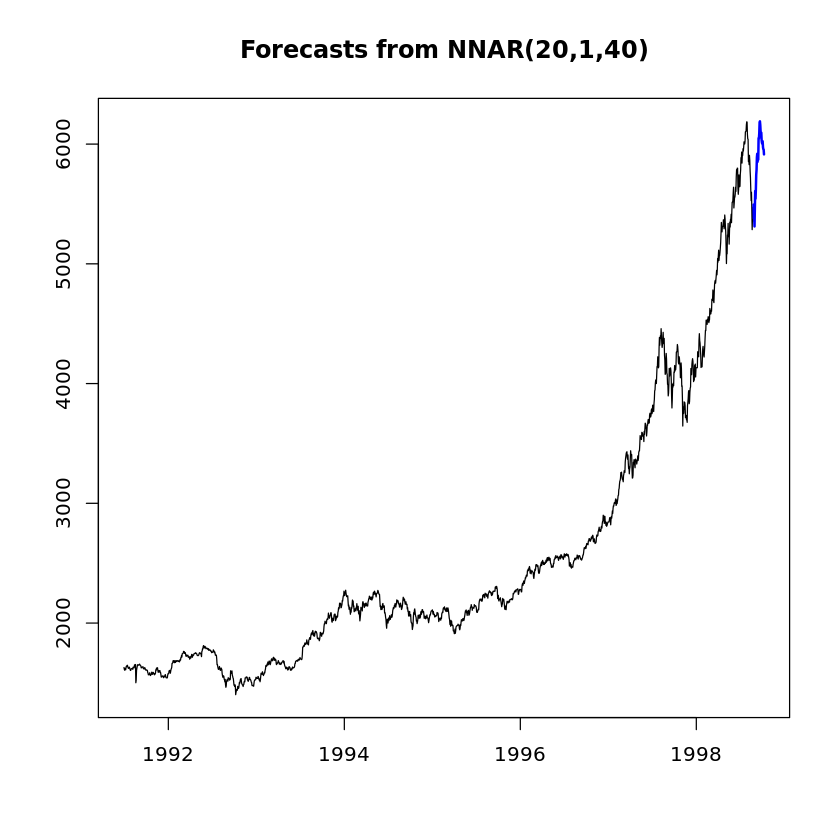

In [202]:
fcast11 <- forecast(model11,32)
plot(fcast11)

In [203]:
model12 <- nnetar(AirPassengers,p=20,P=,size=40,repeats = 10,lambda = 0)

Warning message in max(x$upper):
“no non-missing arguments to max; returning -Inf”

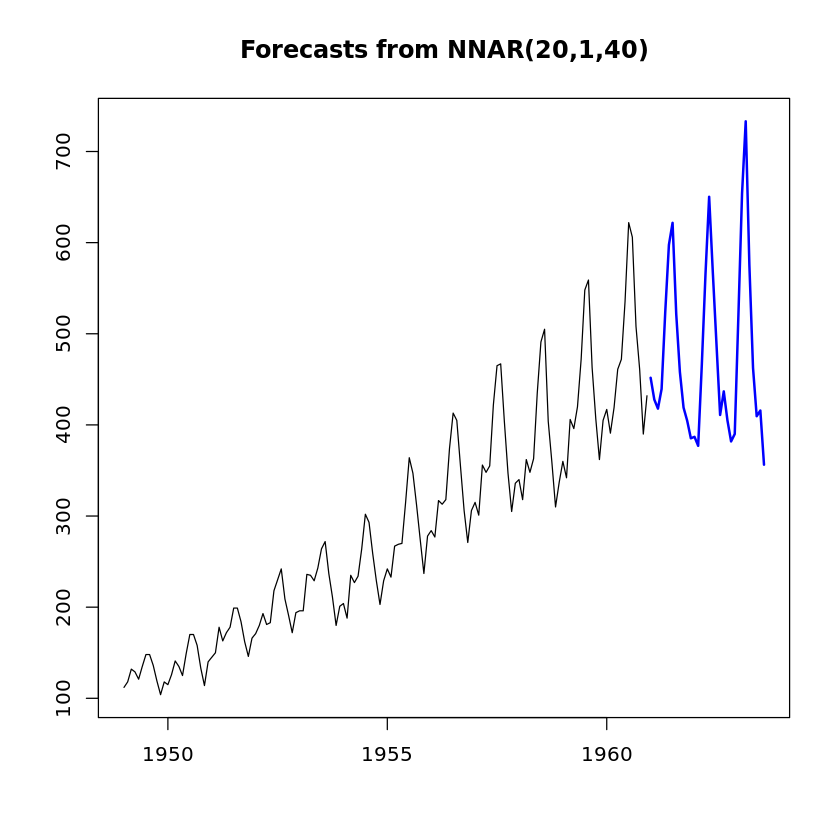

In [205]:
fcast12 <- forecast(model12,32)
plot(fcast12)